In [1]:
from dotenv import load_dotenv
import os
import google.generativeai as genai

load_dotenv()

api_key = os.getenv("gemini_api_key")

genai.configure(api_key=api_key)

/Users/tomasalessi/side-project/alura-google-gemini/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


For Text only, is bettert to use gemini-pro

In [3]:
model = genai.GenerativeModel('gemini-pro')

In [4]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 11.6 ms, sys: 13.3 ms, total: 24.9 ms
Wall time: 6.93 s


In [5]:
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))




In [6]:
to_markdown(response.text)

> The meaning of life is a deeply personal and philosophical question that has been pondered by humans for centuries. There is no one universally accepted answer, as the meaning of life can vary depending on individual beliefs, values, and experiences.
> 
> Some common perspectives on the meaning of life include:
> 
> * **Finding purpose and fulfillment:** Some people believe that the meaning of life lies in finding a purpose or mission that gives them a sense of direction and accomplishment. This could involve pursuing a career, raising a family, or contributing to society in some way.
> 
> * **Experiencing joy and happiness:** Others believe that the meaning of life is simply to enjoy the present moment and experience as much happiness and fulfillment as possible. This could involve pursuing hobbies, spending time with loved ones, or engaging in activities that bring joy.
> 
> * **Making a positive impact:** Some people believe that the meaning of life is to make a positive impact on the world. This could involve helping others, promoting social justice, or protecting the environment.
> 
> * **Seeking knowledge and enlightenment:** Others believe that the meaning of life is to seek knowledge, wisdom, and spiritual enlightenment. This could involve studying philosophy, religion, or other disciplines that help us to understand the world around us.
> 
> * **Living authentically:** Some people believe that the meaning of life is to live authentically and in accordance with their true selves. This could involve being honest, following their passions, and staying true to their values.
> 
> Ultimately, the meaning of life is a question that each individual must answer for themselves. There is no right or wrong answer, and the meaning of life can change over time as we grow and evolve. The important thing is to find a meaning that resonates with you and that gives your life purpose, fulfillment, and joy.

In [7]:
response.prompt_feedback

In [8]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 3.17 ms, sys: 3.17 ms, total: 6.34 ms
Wall time: 883 ms


In [9]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a deep and personal question that has been pondered by philosophers
________________________________________________________________________________
, theologians, and individuals throughout history without a definitive answer. Here are some common perspectives on the meaning of life:

**Purpose-Driven:**
* To
________________________________________________________________________________
 fulfill a specific purpose or destiny
* To leave a legacy or make a positive impact on the world
* To find meaning through work, relationships, or personal growth

**Values-Based:**
* To live a life in accordance with one's values and beliefs
* To pursue happiness, fulfillment, and well
________________________________________________________________________________
-being
* To connect with others and contribute to society

**Experiential:**
* To enjoy the present moment and embrace the experiences life offers
* To seek adventure, curiosity, and the pursuit of knowledge
* To s

for image and text use gemini-pro-vision

In [10]:
model = genai.GenerativeModel('gemini-pro-vision')

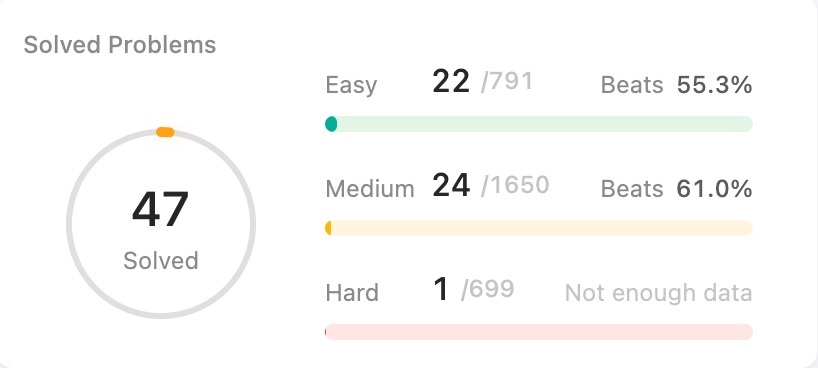

In [11]:
import PIL.Image

image = PIL.Image.open('leetcode-stats.jpg')
image

In [23]:
response = model.generate_content(["Explain what this image is showing and what is its context", image])


In [24]:
response.text

" This image shows a user's progress on solving problems on a certain platform. The user has solved 47 problems in total, 22 of which were easy, 24 of which were medium, and 1 of which was hard. The user has beaten 55.3% of other users who solved easy problems, 61% of other users who solved medium problems, and not enough data is available for hard problems."

for chat conversation use gemini-pro


In [25]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [26]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a magic box that can store and use information to follow our instructions and show us things on a screen.

In [27]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic box that can store and use information to follow our instructions and show us things on a screen."
 }
 role: "model"]

In [28]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that can be programmed to carry out a set of
________________________________________________________________________________
 instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The
________________________________________________________________________________
 hardware includes the central processing unit (CPU), which is the "brain" of the computer and controls all its operations, as well as memory, storage devices, input devices (such as keyboards and mice), and output devices (such as monitors and printers). The software includes the operating system, which manages the computer's
________________________________________________________________________________
 resources and provides a platform for running other software, as well as application software, which performs specific tasks for the user. When a user enters instructions throu

In [29]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a magic box that can store and use information to follow our instructions and show us things on a screen.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The hardware includes the central processing unit (CPU), which is the "brain" of the computer and controls all its operations, as well as memory, storage devices, input devices (such as keyboards and mice), and output devices (such as monitors and printers). The software includes the operating system, which manages the computer's resources and provides a platform for running other software, as well as application software, which performs specific tasks for the user. When a user enters instructions through an input device, the CPU fetches the corresponding software instructions from memory and executes them, using the data stored on storage devices. The results of the computation are then displayed on an output device or stored in memory for later use.

In [30]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")


[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]
